https://docs.google.com/document/d/1aXMs3yhUWQo1zCAHaAKMWeLcotKM3cvh9-Ao6ED_UrA/edit?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
df = pd.read_csv('Crashes.csv')

In [3]:
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LONG BEACH,-118.114876,33.832226
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.172241,34.088795
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.276199,33.938290
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LANCASTER,-118.218719,34.687332


In [4]:
# Incorporate point x and y into lat long
# Step 1: Fill in missing LAT/LON with POINT_X/POINT_Y
df['LONGITUDE'] = df['LONGITUDE'].fillna(df['POINT_X'])
df['LATITUDE'] = df['LATITUDE'].fillna(df['POINT_Y'])

In [5]:
df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,0,-,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,0,-,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,0,-,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,0,-,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332


In [6]:
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [7]:
# Step 3: Drop rows missing any critical values (required for analysis)
df = df.dropna(subset=['COLLISION_SEVERITY', 'LATITUDE', 'LONGITUDE'])

df.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,0,-,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,0,-,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,0,-,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,0,-,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332


In [8]:
# Step 4: Convert numeric columns properly
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns: 
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Step 5: Create binary outcome variable for severity
df['IS_SEVERE'] = df['COLLISION_SEVERITY'].apply(lambda x: 1 if x in [1, 2] else 0)

# Step 6: Drop any completely empty rows, and forward-fill where it makes sense
df = df.dropna(how="all")

# Optional: Check missing value status
nan_count = df.isna().sum()
nan_pct = df.isna().sum() / len(df) * 100
print("Number of missing values per column:\n", nan_count)
print("\nPercentage of missing values:\n", nan_pct.round(2), "%")

# Preview cleaned data
df.head()
#print(df['MOTORCYCLE_ACCIDENT'].value_counts(dropna=False))
# set case ID as index (eisha)

# Connect it to tracts data census (abirami)
# produce contextily map for reference with crs 4326

# produce some basic summary stats

Number of missing values per column:
 CASE_ID             0
ACCIDENT_YEAR       0
PROC_DATE           0
JURIS               0
COLLISION_DATE      0
                 ... 
COUNTY              0
CITY                0
POINT_X           297
POINT_Y           297
IS_SEVERE           0
Length: 81, dtype: int64

Percentage of missing values:
 CASE_ID           0.00
ACCIDENT_YEAR     0.00
PROC_DATE         0.00
JURIS             0.00
COLLISION_DATE    0.00
                  ... 
COUNTY            0.00
CITY              0.00
POINT_X           0.74
POINT_Y           0.74
IS_SEVERE         0.00
Length: 81, dtype: float64 %


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,0,-,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179,0
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,0,-,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226,0
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,0,-,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795,0
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,0,-,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290,1
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,0,-,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332,0


In [9]:
# Step 7: Convert to GeoDataFrame using lat/lon
collision_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']), crs='EPSG:4326')

# Step 8: Read CalEnviroScreen shapefile and filter for LA County
enviroscreen = gpd.read_file('CalEnviroScreen/CES4 Final Shapefile.shp')
enviroscreen = enviroscreen[enviroscreen.County == 'Los Angeles']

# Step 9: Project to same CRS (EPSG:3310)
collision_gdf = collision_gdf.to_crs('EPSG:3310')
enviroscreen = enviroscreen.to_crs('EPSG:3310')

# Step 10: Spatial join — assign each collision to a census tract
collision_gdf = gpd.sjoin(collision_gdf, enviroscreen[['Tract', 'geometry']], how='inner', predicate='intersects')


In [10]:
# Step 11: Calculate total and severe collision counts by tract
total_counts = collision_gdf.groupby('Tract').size()
severe_counts = collision_gdf.groupby('Tract')['IS_SEVERE'].sum()

# Step 12: Combine metrics into one DataFrame
tract_stats = pd.concat([total_counts, severe_counts], axis=1)
tract_stats.columns = ['n_collisions', 'n_severe_collisions']
tract_stats['pct_severe'] = tract_stats['n_severe_collisions'] / tract_stats['n_collisions']

# Step 13: Join stats back to enviroscreen
enviroscreen = enviroscreen.set_index('Tract').join(tract_stats)

# Step 14: Fill tracts with no collisions with 0s
enviroscreen[['n_collisions', 'n_severe_collisions', 'pct_severe']] = enviroscreen[
    ['n_collisions', 'n_severe_collisions', 'pct_severe']
].fillna(0)

# Step 15: Summary checks
print("Rows in collision_gdf after join:", len(collision_gdf))
print("\nSummary of collision metrics:")
print(enviroscreen[['n_collisions', 'n_severe_collisions', 'pct_severe']].describe())

Rows in collision_gdf after join: 39747

Summary of collision metrics:
       n_collisions  n_severe_collisions   pct_severe
count   2343.000000          2343.000000  2343.000000
mean      16.964149             1.915920     0.143451
std       18.951407             2.527765     0.177570
min        0.000000             0.000000     0.000000
25%        5.000000             0.000000     0.000000
50%       11.000000             1.000000     0.090909
75%       23.000000             3.000000     0.200000
max      191.000000            54.000000     1.000000


In [11]:
collision_gdf.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE,geometry,index_right,Tract
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179,0,POINT (162894.188 -428548.437),7186,6.037302e+09
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226,0,POINT (174515.352 -463040.016),7369,6.037574e+09
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795,0,POINT (168656.778 -434691.233),7701,6.037202e+09
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290,1,POINT (159368.644 -451562.69),7665,6.037241e+09
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332,0,POINT (163120.729 -368366.587),6139,6.037901e+09


In [12]:
enviroscreen.head()

,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,PM2_5_P,...,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry,n_collisions,n_severe_collisions,pct_severe
Tract,,,,,,,,,,,,,,,,,,,,,
6.037920e+09,91321,Los Angeles,Santa Clarita,6881,37.794504,71.747353,0.065915,95.270691,9.600230,45.575607,...,0.3779,0.0000,4.2581,6695.407818,1.656762e+06,3.5460,"POLYGON ((135258.65 -402745.383, 135455.13 -40...",14.0,2.0,0.142857
6.037920e+09,91350,Los Angeles,Santa Clarita,2399,12.056400,18.116490,0.064647,93.627878,10.007159,49.259490,...,1.0004,0.0000,4.4185,4568.318508,9.978606e+05,11.5465,"POLYGON ((137014.367 -395334.286, 137043.791 -...",6.0,0.0,0.000000
6.037573e+09,90806,Los Angeles,Long Beach,1843,41.268529,77.029753,0.039755,20.846297,11.644591,64.231487,...,5.4259,0.5969,2.7672,2746.793784,4.497052e+05,20.7813,"POLYGON ((166781.012 -467093.264, 166797.258 -...",7.0,1.0,0.142857
6.037572e+09,90805,Los Angeles,Long Beach,4076,45.079133,82.097832,0.041926,26.695706,12.145825,86.857498,...,16.7812,0.8096,0.9078,3409.734439,4.811644e+05,8.1207,"POLYGON ((167983.809 -460715.458, 167993.503 -...",16.0,1.0,0.062500
6.037570e+09,90805,Los Angeles,Long Beach,4832,74.368676,99.596571,0.042599,29.894213,12.427748,90.603609,...,4.7392,0.0000,0.8278,3222.654487,5.718710e+05,6.7053,"POLYGON ((166480.934 -457746.407, 166497.85 -4...",22.0,0.0,0.000000


In [13]:
df[['LATITUDE', 'LONGITUDE']].describe()


,LATITUDE,LONGITUDE
count,40271.000000,40271.000000
mean,34.069297,-118.215404
std,0.256486,0.217949
min,32.922520,-123.408096
25%,33.934565,-118.338711
50%,34.037060,-118.210533
75%,34.141491,-118.107269
max,39.960209,-114.226219


<Axes: >

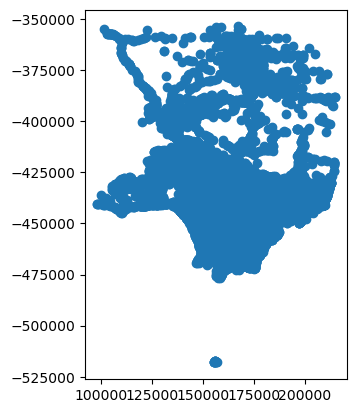

In [14]:
collision_gdf.plot()  # Simple plot to spot crazy outliers


In [15]:
df[['LATITUDE', 'LONGITUDE']].describe()
df[df['LATITUDE'] < 32]  # Lower than SoCal bounds?


,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE


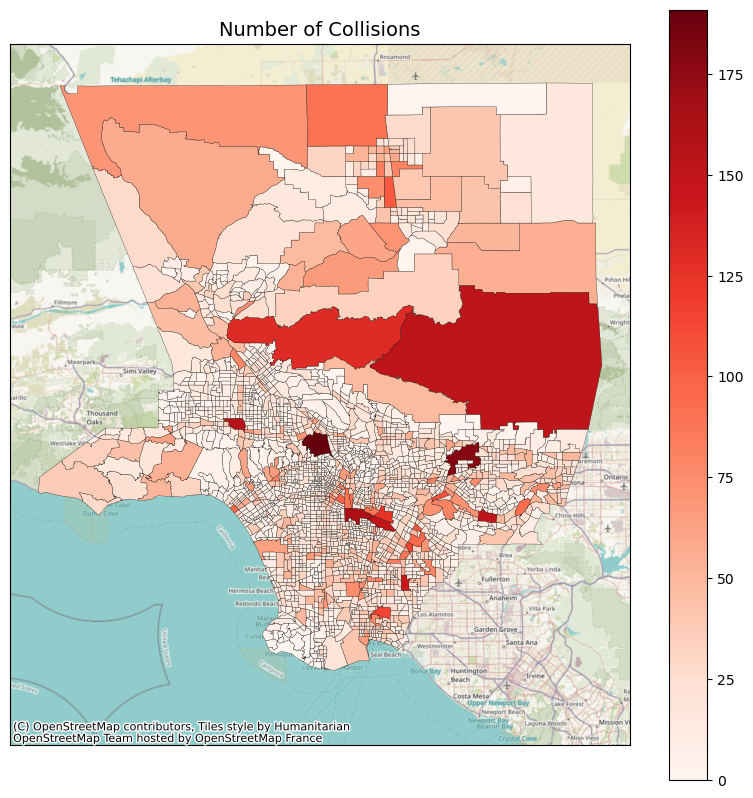

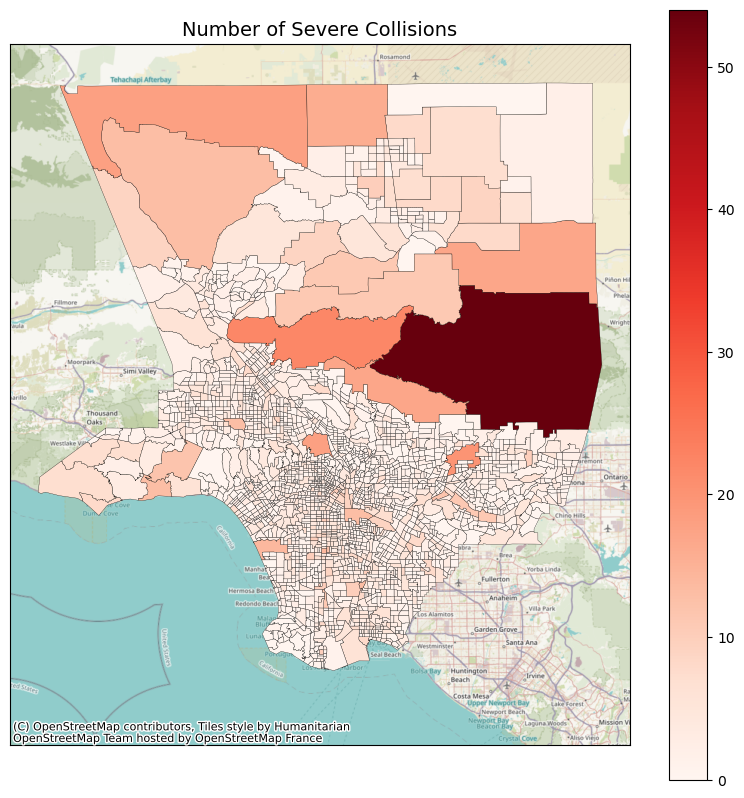

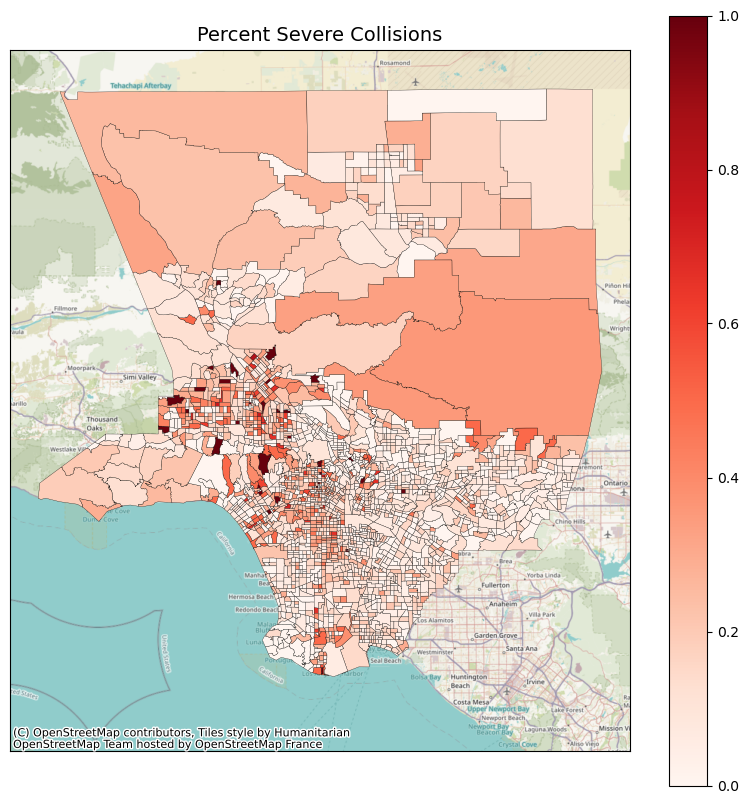

In [16]:
# Reproject Enviroscreen to Web Mercator
enviroscreen_web = enviroscreen.to_crs(epsg=3857)

# Plot maps for each desired column
for column, title in [
    ('n_collisions', 'Number of Collisions'),
    ('n_severe_collisions', 'Number of Severe Collisions'),
    ('pct_severe', 'Percent Severe Collisions')
]:
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot tract polygons colored by column values
    enviroscreen_web.plot(
        column=column,
        legend=True,
        cmap='Reds',
        ax=ax,
        edgecolor='black',
        linewidth=0.2,
        missing_kwds={'color': 'lightgrey'}
    )

    # Add basemap behind
    ctx.add_basemap(ax, zoom=10)

    # Clean up axis
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title, fontsize=14)

    # Optional: Zoom to LA mainland only (hide Catalina Island)
    ax.set_ylim(3970000, 4150000)

In [17]:
df['CASE_ID'].is_unique

True

In [18]:
df.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [19]:
# how many sereve/fatal accidents in which tracts, top 10 tracts
# how many severe/datal accidents by weather
# mean number of accidents in top 10 tracts

#create boolean table with 1 if accidents are severe or fatal and 0 if not

In [20]:
# lets go over wrangling and spatial relations

In [21]:
# 3 maps
# q that just shows crashes in LA
# Machine learning 

In [22]:
# Keep only points within a reasonable SoCal bounding box
df = df[
    (df['LATITUDE'] > 33.5) & (df['LATITUDE'] < 34.5) &
    (df['LONGITUDE'] > -119) & (df['LONGITUDE'] < -117)
]


In [23]:
collision_gdf.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE,geometry,index_right,Tract
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179,0,POINT (162894.188 -428548.437),7186,6.037302e+09
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226,0,POINT (174515.352 -463040.016),7369,6.037574e+09
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795,0,POINT (168656.778 -434691.233),7701,6.037202e+09
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290,1,POINT (159368.644 -451562.69),7665,6.037241e+09
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332,0,POINT (163120.729 -368366.587),6139,6.037901e+09


In [24]:
print(enviroscreen.columns)


Index(['ZIP', 'County', 'ApproxLoc', 'TotPop19', 'CIscore', 'CIscoreP',
       'Ozone', 'OzoneP', 'PM2_5', 'PM2_5_P', 'DieselPM', 'DieselPM_P',
       'Pesticide', 'PesticideP', 'Tox_Rel', 'Tox_Rel_P', 'Traffic',
       'TrafficP', 'DrinkWat', 'DrinkWatP', 'Lead', 'Lead_P', 'Cleanup',
       'CleanupP', 'GWThreat', 'GWThreatP', 'HazWaste', 'HazWasteP',
       'ImpWatBod', 'ImpWatBodP', 'SolWaste', 'SolWasteP', 'PollBurd',
       'PolBurdSc', 'PolBurdP', 'Asthma', 'AsthmaP', 'LowBirtWt', 'LowBirWP',
       'Cardiovas', 'CardiovasP', 'Educatn', 'EducatP', 'Ling_Isol',
       'Ling_IsolP', 'Poverty', 'PovertyP', 'Unempl', 'UnemplP', 'HousBurd',
       'HousBurdP', 'PopChar', 'PopCharSc', 'PopCharP', 'Child_10',
       'Pop_10_64', 'Elderly65', 'Hispanic', 'White', 'AfricanAm', 'NativeAm',
       'OtherMult', 'Shape_Leng', 'Shape_Area', 'AAPI', 'geometry',
       'n_collisions', 'n_severe_collisions', 'pct_severe'],
      dtype='object')


In [25]:
enviroscreen.head()

,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,PM2_5_P,...,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry,n_collisions,n_severe_collisions,pct_severe
Tract,,,,,,,,,,,,,,,,,,,,,
6.037920e+09,91321,Los Angeles,Santa Clarita,6881,37.794504,71.747353,0.065915,95.270691,9.600230,45.575607,...,0.3779,0.0000,4.2581,6695.407818,1.656762e+06,3.5460,"POLYGON ((135258.65 -402745.383, 135455.13 -40...",14.0,2.0,0.142857
6.037920e+09,91350,Los Angeles,Santa Clarita,2399,12.056400,18.116490,0.064647,93.627878,10.007159,49.259490,...,1.0004,0.0000,4.4185,4568.318508,9.978606e+05,11.5465,"POLYGON ((137014.367 -395334.286, 137043.791 -...",6.0,0.0,0.000000
6.037573e+09,90806,Los Angeles,Long Beach,1843,41.268529,77.029753,0.039755,20.846297,11.644591,64.231487,...,5.4259,0.5969,2.7672,2746.793784,4.497052e+05,20.7813,"POLYGON ((166781.012 -467093.264, 166797.258 -...",7.0,1.0,0.142857
6.037572e+09,90805,Los Angeles,Long Beach,4076,45.079133,82.097832,0.041926,26.695706,12.145825,86.857498,...,16.7812,0.8096,0.9078,3409.734439,4.811644e+05,8.1207,"POLYGON ((167983.809 -460715.458, 167993.503 -...",16.0,1.0,0.062500
6.037570e+09,90805,Los Angeles,Long Beach,4832,74.368676,99.596571,0.042599,29.894213,12.427748,90.603609,...,4.7392,0.0000,0.8278,3222.654487,5.718710e+05,6.7053,"POLYGON ((166480.934 -457746.407, 166497.85 -4...",22.0,0.0,0.000000


In [26]:
enviroscreen = enviroscreen.reset_index()


In [27]:
print(collision_gdf.columns)

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [28]:
if 'index_right' in collision_gdf.columns:
    collision_gdf = collision_gdf.drop(columns='index_right')


In [29]:
collision_gdf = gpd.sjoin(
    collision_gdf,
    enviroscreen[['Tract', 'geometry']],
    how='left',
    predicate='intersects'
)


In [30]:
collision_gdf = collision_gdf.rename(columns={'index_right': 'index_right_old'})


In [31]:
collision_gdf = gpd.sjoin(
    collision_gdf,
    enviroscreen[['Tract', 'geometry']],
    how='left',  # ⚠️ Changed from "inner"
    predicate='intersects'
)

# How many points failed to join?
print("Unmatched points:", collision_gdf['Tract'].isna().sum())


Unmatched points: 0


In [32]:
total_counts = collision_gdf.groupby('Tract').size()
severe_counts = collision_gdf.groupby('Tract')['IS_SEVERE'].sum()

tract_stats = pd.concat([total_counts, severe_counts], axis=1)
tract_stats.columns = ['n_collisions', 'n_severe_collisions']
tract_stats['pct_severe'] = tract_stats['n_severe_collisions'] / tract_stats['n_collisions']


In [33]:
enviroscreen = enviroscreen.drop(columns=[
    'n_collisions', 'n_severe_collisions', 'pct_severe'
], errors='ignore')  # `errors='ignore'` avoids crash if they aren't present


In [34]:
enviroscreen = enviroscreen.join(tract_stats)


In [35]:
# Drop old metrics
enviroscreen = enviroscreen.drop(columns=[
    'n_collisions', 'n_severe_collisions', 'pct_severe'
], errors='ignore')

# Add updated ones
enviroscreen = enviroscreen.join(tract_stats)

# Fill any nulls with 0
enviroscreen[['n_collisions', 'n_severe_collisions', 'pct_severe']] = (
    enviroscreen[['n_collisions', 'n_severe_collisions', 'pct_severe']].fillna(0)
)


In [36]:
collision_gdf.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,CITY,POINT_X,POINT_Y,IS_SEVERE,geometry,Tract_left,index_right_old,Tract_right,index_right,Tract
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,GLENDALE,-118.233429,34.146179,0,POINT (162894.188 -428548.437),6.037302e+09,1494,6.037302e+09,1494,6.037302e+09
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,LONG BEACH,-118.114876,33.832226,0,POINT (174515.352 -463040.016),6.037574e+09,1677,6.037574e+09,1677,6.037574e+09
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,LOS ANGELES,-118.172241,34.088795,0,POINT (168656.778 -434691.233),6.037202e+09,2009,6.037202e+09,2009,6.037202e+09
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,LOS ANGELES,-118.276199,33.938290,1,POINT (159368.644 -451562.69),6.037241e+09,1973,6.037241e+09,1973,6.037241e+09
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,LANCASTER,-118.218719,34.687332,0,POINT (163120.729 -368366.587),6.037901e+09,447,6.037901e+09,447,6.037901e+09


In [37]:
collision_gdf = collision_gdf.drop(columns=['Tract_left', 'index_right_old',	'Tract_right',	'index_right'])


In [38]:
collision_gdf.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE,geometry,Tract
0,9395381,2022,2022-01-28,1925,2022-01-14,1928,21676,240,5,5,...,-,34.145142,-118.233437,LOS ANGELES,GLENDALE,-118.233429,34.146179,0,POINT (162894.188 -428548.437),6.037302e+09
1,9400001,2022,2022-04-04,1941,2022-01-18,1822,5621,NaN,2,5,...,-,33.832226,-118.114876,LOS ANGELES,LONG BEACH,-118.114876,33.832226,0,POINT (174515.352 -463040.016),6.037574e+09
2,9400151,2022,2022-02-24,1942,2022-01-23,1015,41419,0418,7,5,...,-,34.088795,-118.172241,LOS ANGELES,LOS ANGELES,-118.172241,34.088795,0,POINT (168656.778 -434691.233),6.037202e+09
3,9401502,2022,2022-02-17,1942,2022-01-11,1915,38577,1832,2,5,...,-,33.938290,-118.276199,LOS ANGELES,LOS ANGELES,-118.276199,33.938290,1,POINT (159368.644 -451562.69),6.037241e+09
4,9401860,2022,2022-03-10,1900,2022-02-04,1951,629461,1127,5,5,...,-,34.687332,-118.218719,LOS ANGELES,LANCASTER,-118.218719,34.687332,0,POINT (163120.729 -368366.587),6.037901e+09


In [39]:
collision_gdf.columns

Index(['CASE_ID', 'ACCIDENT_YEAR', 'PROC_DATE', 'JURIS', 'COLLISION_DATE',
       'COLLISION_TIME', 'OFFICER_ID', 'REPORTING_DISTRICT', 'DAY_OF_WEEK',
       'CHP_SHIFT', 'POPULATION', 'CNTY_CITY_LOC', 'SPECIAL_COND', 'BEAT_TYPE',
       'CHP_BEAT_TYPE', 'CITY_DIVISION_LAPD', 'CHP_BEAT_CLASS', 'BEAT_NUMBER',
       'PRIMARY_RD', 'SECONDARY_RD', 'DISTANCE', 'DIRECTION', 'INTERSECTION',
       'WEATHER_1', 'WEATHER_2', 'STATE_HWY_IND', 'CALTRANS_COUNTY',
       'CALTRANS_DISTRICT', 'STATE_ROUTE', 'ROUTE_SUFFIX', 'POSTMILE_PREFIX',
       'POSTMILE', 'LOCATION_TYPE', 'RAMP_INTERSECTION', 'SIDE_OF_HWY',
       'TOW_AWAY', 'COLLISION_SEVERITY', 'NUMBER_KILLED', 'NUMBER_INJURED',
       'PARTY_COUNT', 'PRIMARY_COLL_FACTOR', 'PCF_CODE_OF_VIOL',
       'PCF_VIOL_CATEGORY', 'PCF_VIOLATION', 'PCF_VIOL_SUBSECTION',
       'HIT_AND_RUN', 'TYPE_OF_COLLISION', 'MVIW', 'PED_ACTION',
       'ROAD_SURFACE', 'ROAD_COND_1', 'ROAD_COND_2', 'LIGHTING',
       'CONTROL_DEVICE', 'CHP_ROAD_TYPE', 'PEDESTRIAN_

In [40]:
print(collision_gdf['Tract'].value_counts().head(10))
print("Total unique tracts:", collision_gdf['Tract'].nunique())
print("Total crashes:", len(collision_gdf))


Tract
6.037980e+09    191
6.037405e+09    182
6.037980e+09    178
6.037532e+09    173
6.037532e+09    161
6.037408e+09    158
6.037930e+09    151
6.037555e+09    146
6.037532e+09    131
6.037930e+09    130
Name: count, dtype: int64
Total unique tracts: 2262
Total crashes: 42333


In [41]:
# Count total crashes per tract
top_tracts = collision_gdf['Tract'].value_counts().head(10).index.tolist()

# Filter collision_gdf to include only crashes in those tracts
top_collision_gdf = collision_gdf[collision_gdf['Tract'].isin(top_tracts)]


NameError: name 'top_tract_gdf' is not defined

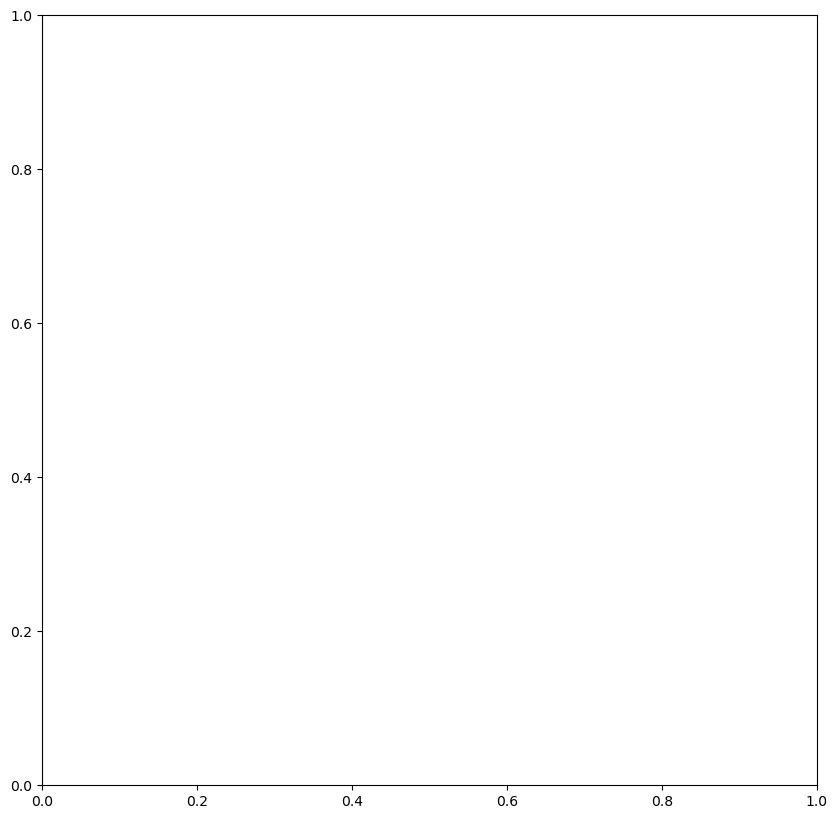

In [42]:
import matplotlib.pyplot as plt
import contextily as ctx

# Plot only the top 10 tracts
fig, ax = plt.subplots(figsize=(10, 10))

top_tract_gdf.plot(
    column='n_collisions',
    cmap='Reds',
    legend=True,
    edgecolor='black',
    linewidth=0.5,
    ax=ax
)

# Add basemap
ctx.add_basemap(ax, zoom=12)

# Tidy up
ax.set_title("Top 10 Census Tracts by Collision Count", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_axis_off()

plt.show()


In [43]:
# Aggregate stats by Tract
top_tract_stats = top_collision_gdf.groupby('Tract').agg(
    n_collisions=('CASE_ID', 'count'),
    n_severe_collisions=('IS_SEVERE', 'sum')
).reset_index()

top_tract_stats['pct_severe'] = top_tract_stats['n_severe_collisions'] / top_tract_stats['n_collisions']

# Get 1 geometry per tract
top_tract_geoms = top_collision_gdf[['Tract', 'geometry']].drop_duplicates(subset='Tract')

# Merge
top_tract_gdf = top_tract_geoms.merge(top_tract_stats, on='Tract').to_crs(epsg=3857)


In [44]:
tract_gdf = enviroscreen.reset_index().merge(tract_stats, on='Tract')
tract_gdf = tract_gdf.to_crs(epsg=3857)


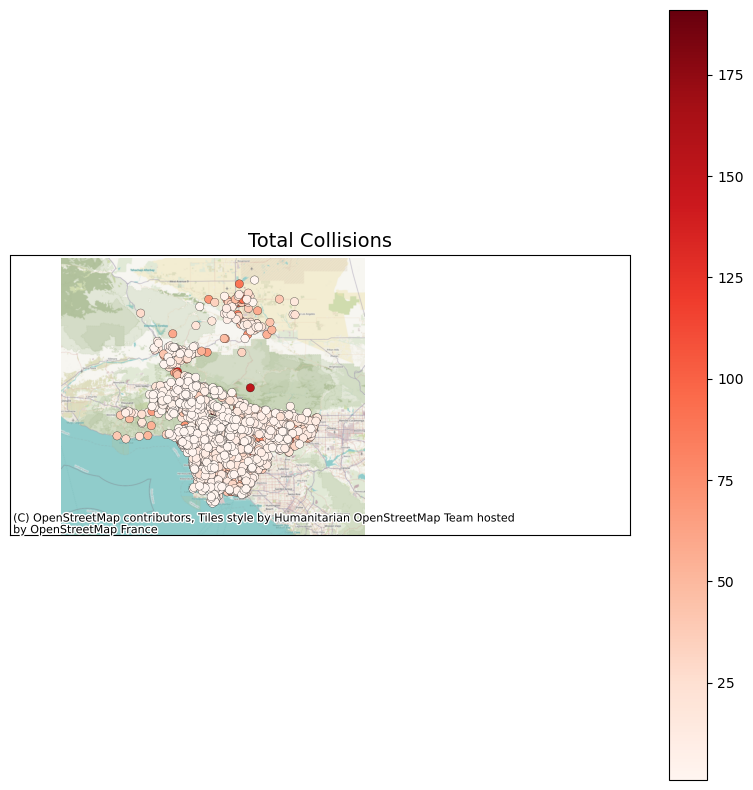

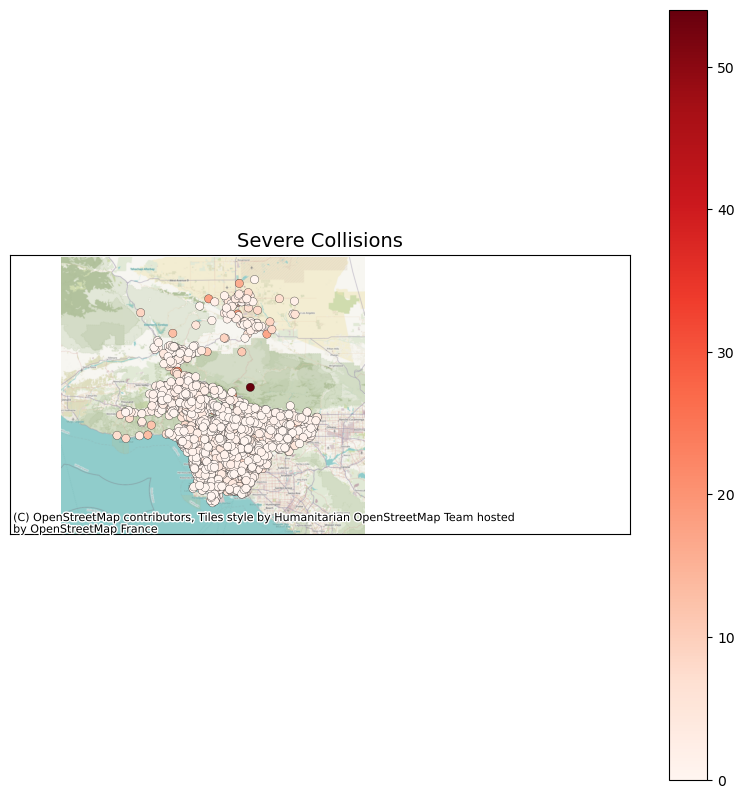

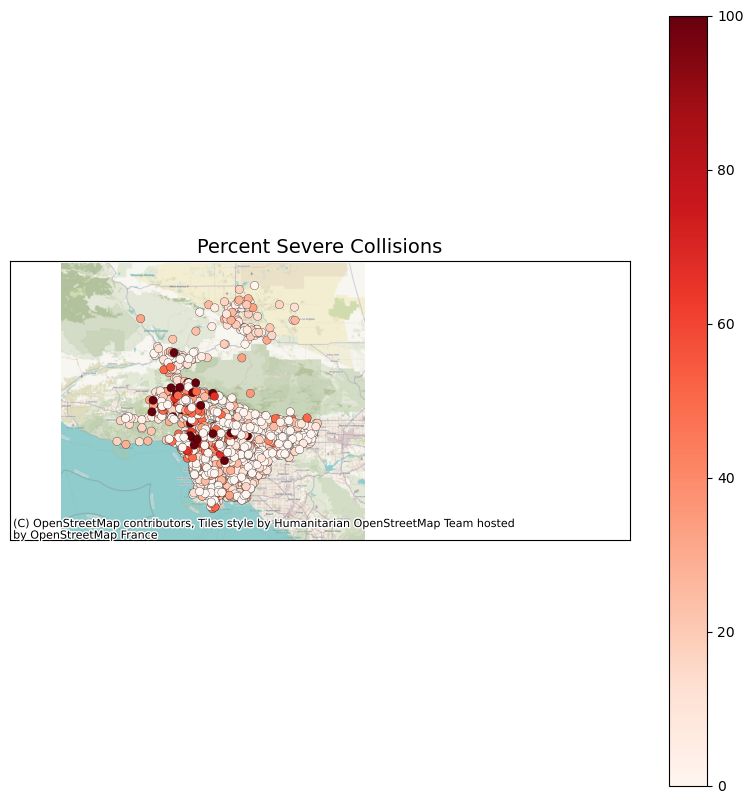

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# STEP 1: Aggregate collision stats by Tract
tract_stats = collision_gdf.groupby('Tract').agg(
    n_collisions=('CASE_ID', 'count'),
    n_severe_collisions=('IS_SEVERE', 'sum')
).reset_index()

tract_stats['pct_severe'] = (tract_stats['n_severe_collisions'] / tract_stats['n_collisions'])*100

# STEP 2: Extract one geometry per Tract
tract_shapes = collision_gdf[['Tract', 'geometry']].drop_duplicates(subset='Tract')

# STEP 3: Merge stats with geometry
tract_gdf = tract_shapes.merge(tract_stats, on='Tract')

# STEP 4: Reproject to Web Mercator for mapping
tract_gdf = tract_gdf.to_crs(epsg=3857)

# STEP 5: Plot maps
for column, title in [
    ('n_collisions', 'Total Collisions'),
    ('n_severe_collisions', 'Severe Collisions'),
    ('pct_severe', 'Percent Severe Collisions')
]:
    fig, ax = plt.subplots(figsize=(10, 10))

    tract_gdf.plot(
        column=column,
        cmap='Reds',
        legend=True,
        edgecolor='black',
        linewidth=0.2,
        ax=ax,
        missing_kwds={'color': 'lightgrey'}
    )

    ctx.add_basemap(ax, zoom=10)

    ax.set_title(title, fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(3970000, 4150000)
    ax.set_xlim(-1.33e7, -1.29e7)

    plt.show()


In [48]:
party_df = pd.read_csv('Parties.csv')
# Ensure CASEID column exists and is aligned

# Merge crash data into party level
party_with_collision = party_df.merge(collision_gdf, on='CASE_ID', how='left')

/var/folders/8q/fckhbb_x441bfx284y2c5d8m0000gn/T/ipykernel_61445/3143889983.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  party_df = pd.read_csv('Parties.csv')


In [49]:
party_with_collision.head()

,CASE_ID,PARTY_NUMBER,PARTY_TYPE,AT_FAULT,PARTY_SEX,PARTY_AGE,PARTY_SOBRIETY,PARTY_DRUG_PHYSICAL,DIR_OF_TRAVEL,PARTY_SAFETY_EQUIP_1,...,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,IS_SEVERE,geometry,Tract
0,91951222,1,1,Y,F,75,A,-,N,L,...,-,34.674770,-118.289108,LOS ANGELES,UNINCORPORATED,-118.289131,34.674751,0.0,POINT (156700.772 -369879.429),6.037901e+09
1,91951222,2,1,N,F,45,A,-,W,L,...,-,34.674770,-118.289108,LOS ANGELES,UNINCORPORATED,-118.289131,34.674751,0.0,POINT (156700.772 -369879.429),6.037901e+09
2,91951222,3,1,N,F,44,A,-,S,M,...,-,34.674770,-118.289108,LOS ANGELES,UNINCORPORATED,-118.289131,34.674751,0.0,POINT (156700.772 -369879.429),6.037901e+09
3,91947166,1,1,Y,F,32,A,-,W,M,...,-,33.877102,-118.180069,LOS ANGELES,LONG BEACH,-118.180069,33.876934,0.0,POINT (168385.304 -458181.838),6.037570e+09
4,91947166,2,1,N,F,63,A,-,W,M,...,-,33.877102,-118.180069,LOS ANGELES,LONG BEACH,-118.180069,33.876934,0.0,POINT (168385.304 -458181.838),6.037570e+09
